<a href="https://colab.research.google.com/github/MohamadHussein/Gradproject/blob/master/StudentsPerf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from matplotlib import pyplot
import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from numpy import std,mean
from sklearn.model_selection import RandomizedSearchCV





In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The dataset in this study is used to classify students based on their performance. data is collected from LMS(Learning management system), consisting of 480 students and 16 features, . The features are classified into three major categories: (1) Demographic features such as gender and nationality. (2) Academic background features such as educational stage, grade Level and section. (3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

# EXPLORATORY DATA ANALYSIS:

Special attention needs to be given to data types in order to perform correct measures on it.

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numerical:0-100)

11- Visited resources- how many times the student visits a course content(numerical:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numerical:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numerical:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

17 Class: is our target label where:

Low-Level: interval includes values from 0 to 69, denoted with L in our CLASS column

Middle-Level: interval includes values from 70 to 89, denoted with M in our CLASS column

High-Level: interval includes values from 90-100, denoted with M in our CLASS column

 

In [4]:
#load dataset into a dataframe

data=pd.read_csv('/content/drive/My Drive/Edtech/Edtec/xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
#check for missing values
print(data.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [6]:
#descriptive statistics for numerical (ratio data ) columns
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


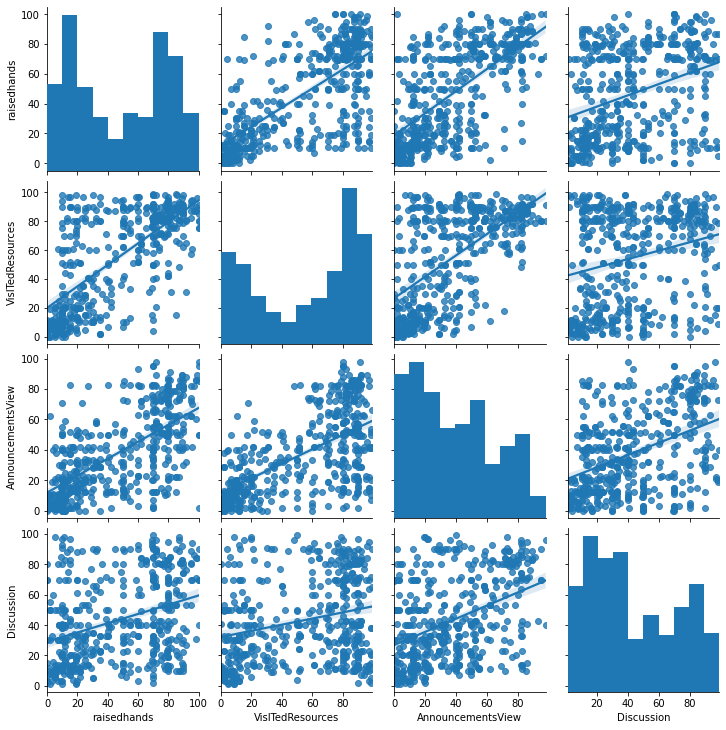

In [7]:
#to visualize pairwise relationship betweeen numerical data (addressing correlation)
#we use pairplot and we fit a line to the scatter plots to better see the trend,our variables are positively correlated 
#plots across the diagonal show univariate distribution of data for each variable
sns.pairplot(data, kind="reg")

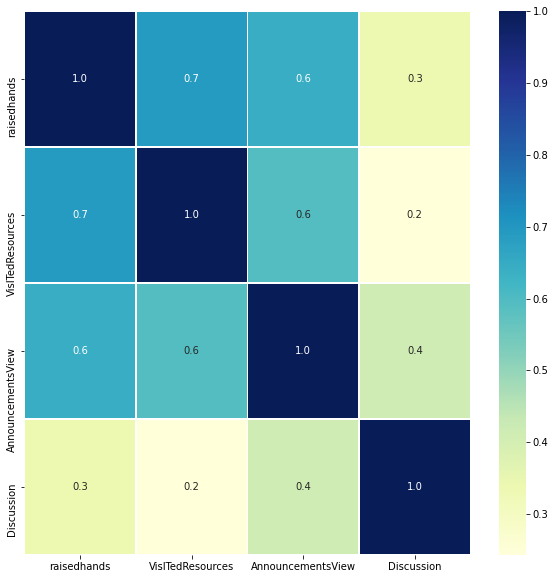

In [ ]:
#we can also use a heatmap to better visualize correlation between numerical variables
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt=".1f",cmap="YlGnBu",ax=ax)
plt.show()


There's no pair of variables that is highly correlated to justify the removal of one of the variables in order to reduce our data dimensionality 

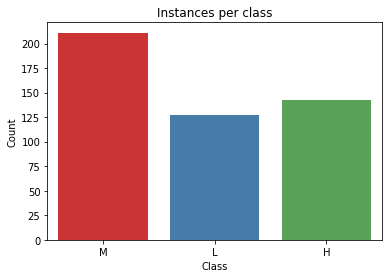

In [ ]:
#to check for class imbalance we use count plots
counts = sns.countplot(x='Class', data=data, palette='Set1')
counts.set(xlabel='Class', ylabel='Count', title='Instances per class')
plt.show()


Luckily our data doesn't suffer from class imbalance 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Instances per class for each gender')]

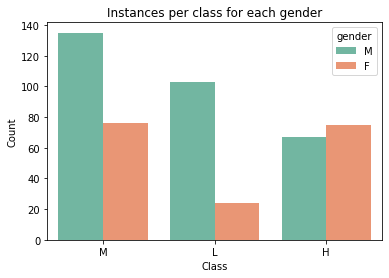

In [17]:
#how about gender
plot=sns.countplot(x='Class',hue='gender',data=data,palette='Set2')
plot.set(xlabel='Class', ylabel='Count', title='Instances per class for each gender') 

Females performed better on average, the greater portion of students who were classified as H class students were females even though our data contained 175 females out of the 480 instances
 


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Abscence Days for students')]

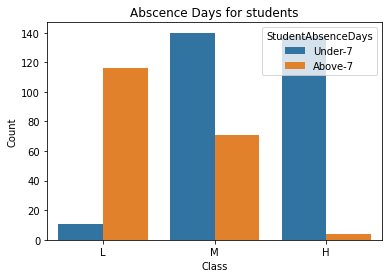

In [18]:
plot=sns.countplot(x='Class',hue='StudentAbsenceDays',data=data,dodge=True,order=['L','M','H'])
plot.set(xlabel='Class', ylabel='Count', title='Abscence Days for students') 

It's evident how student abscene greatly 
affects their final grade

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Responsible parent of student')]

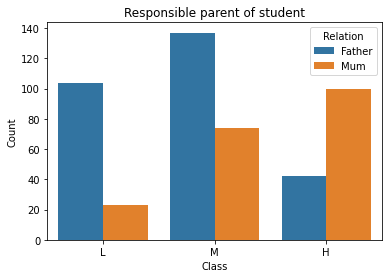

In [20]:
plot=sns.countplot(x='Class',hue='Relation',data=data,dodge=True,order=['L','M','H'])
plot.set(xlabel='Class', ylabel='Count', title='Responsible parent of student') 


The student has higher chance of being in Class H if his/her mother was responsible of them

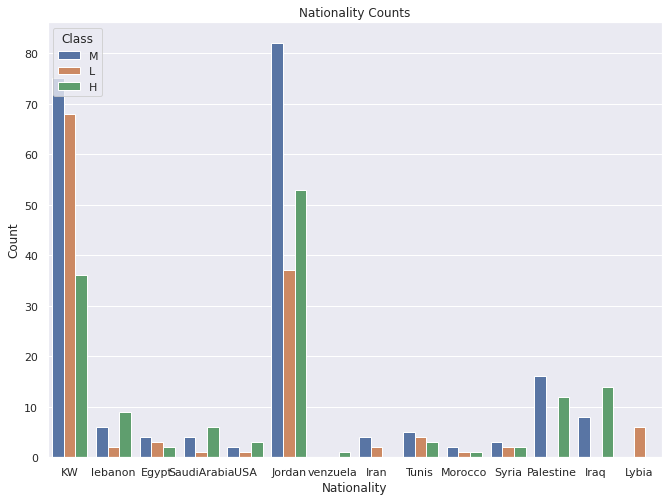

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
nationality = sns.countplot(x='NationalITy', data=data,hue='Class')
nationality.set(xlabel='Nationality', ylabel='Count', title='Nationality Counts')
# plt.setp(nationality.get_xticklabels(), rotation=80)

plt.show()

Most of the students are from Jordan and KW(this isn't a big issue since our dataset is small), however in some countries students distribution over the Classes(L,M,H) is unbalanced(venzuela and lybia for example) which can lead to misclassification in some cases, startified sampling(collecting data from countries with imbalanced entries) or data augmentation could help in such case


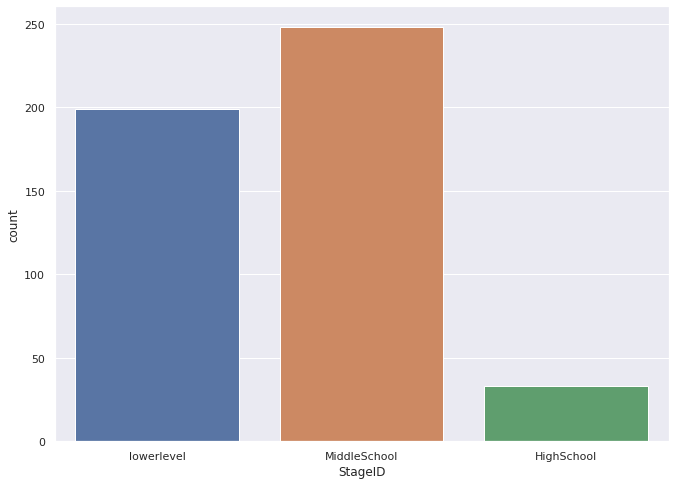

In [ ]:
sns.countplot(x='StageID',data=data)

HighSchool students have the least count in our dataset

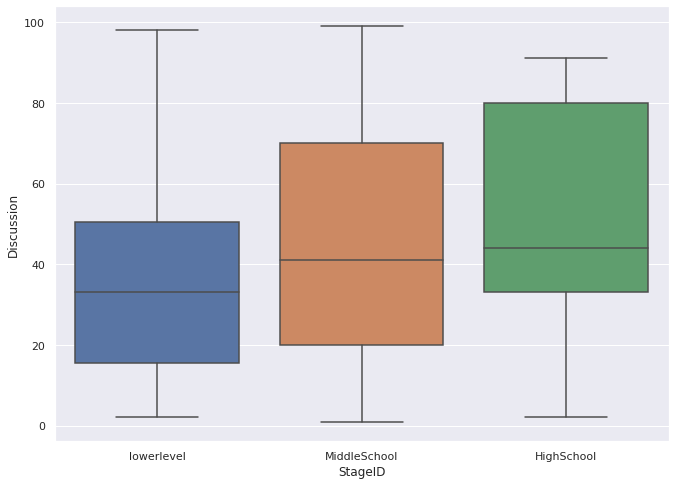

In [ ]:
sns.boxplot(x='StageID',y='Discussion',data=data)


the box plot shows that students in high school tend to engage more often in discussions, given that they are a the minority in our dataset


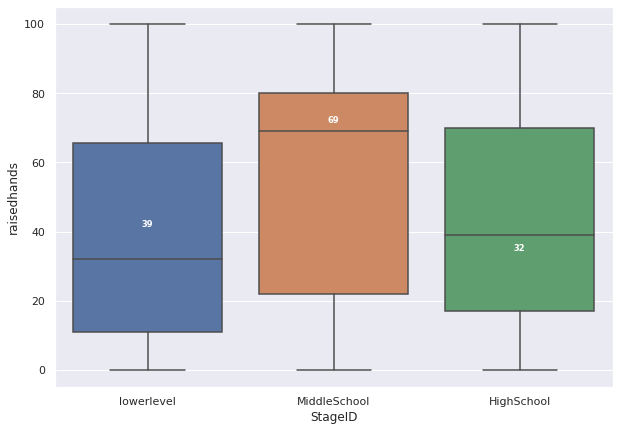

In [12]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,7)})
box_plot=sns.boxplot(x='StageID',y='raisedhands',data=data)
medians = data.groupby(['StageID'])['raisedhands'].median()
vertical_offset = data['raisedhands'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

The boxplot of middle school students show the median to be 69 suggesting that 50% percent of middleschool students have raised their hands 69 or more times which is higher than other students at other levels

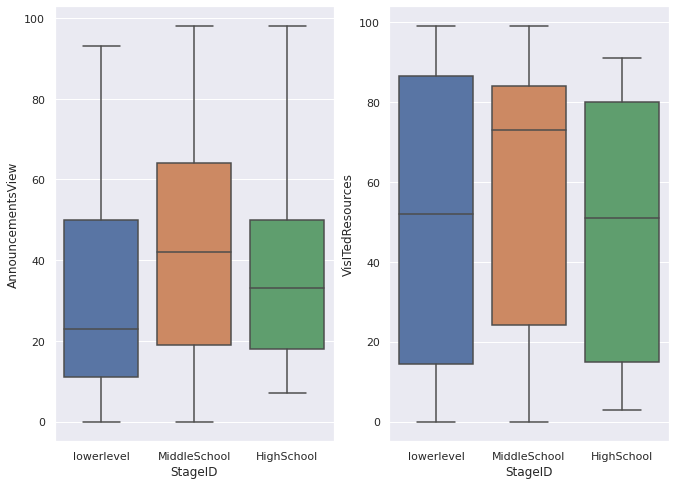

In [ ]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='StageID',y='AnnouncementsView',data=data, ax=ax[0])
sns.boxplot(x='StageID',y='VisITedResources',data=data, ax=ax[1])
fig.show()


there's a high positive correlation between visitedresources and announcementviews as we previously demonstrated,but lower level students viewed the announcement less often than the resources, this could mean that viewing announcements was trickier for lowerlevel students maybe due to the website layout

In [ ]:
#bar charts to visulaize distributions
#aggregate group by (parents/)

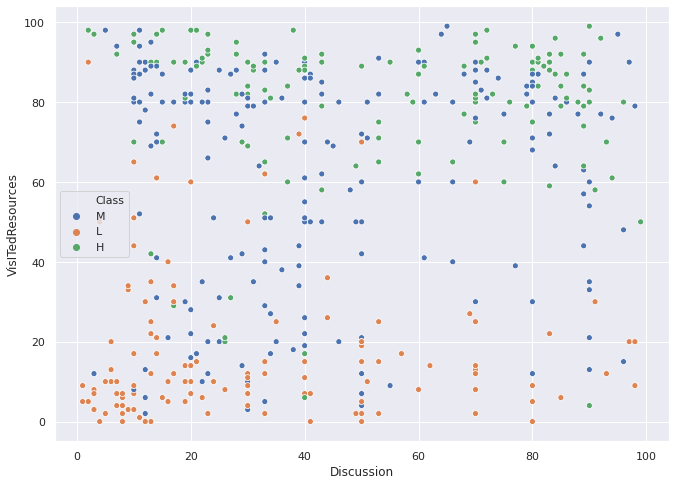

In [13]:
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x="Discussion", y="VisITedResources", hue="Class",data=data)

The plot shows that students engaging more in discussions doesn't necessarily mean that they will do better in their final grade,however visiting resources more often meant better grades 

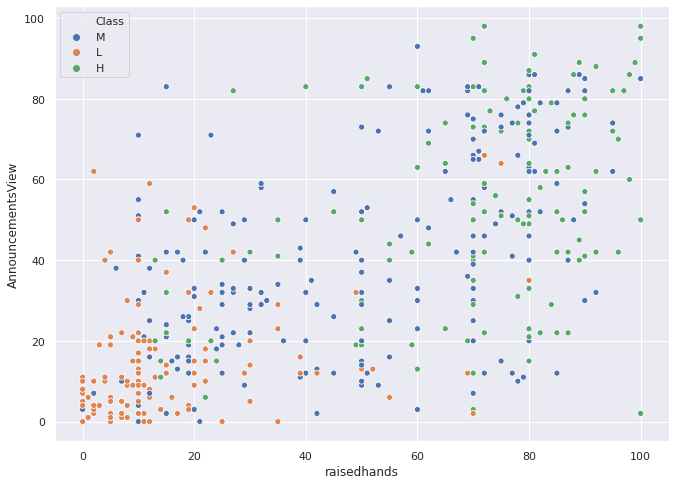

In [ ]:
ax = sns.scatterplot(x="raisedhands", y="AnnouncementsView",hue="Class",data=data)

We can see from the figure above that higher hand raises or higher announcement views mean better grades

In [75]:
#Data Transformation
#Categorical data must be one-hot encoded as follows
X=data.drop(["Class"],axis=1)
y=data["Class"] #even though the target variable is also categorical, sklearn handles encoding it by default 
X_cat=X.select_dtypes(include=["object"]) # object denotes categorical variables
# for col in X_cat:
  # X_cat[col]=X_cat[col].astype('category') #convert columns with object dtype to categorical dtype to reduce computational cost
X_enc = X_cat.copy()
X_enc = pd.get_dummies(X_enc, columns=X_cat.columns)
mergedata = X.drop(X_cat,axis=1)
#Data normalization
sc=StandardScaler()
mergedata_scaled=sc.fit_transform(mergedata)#spoiler alert: normalizing data increased the prediciton accuracy 
mergedata= pd.DataFrame(mergedata_scaled)
print(mergedata.columns)
FinalData = pd.concat([mergedata,X_enc], axis=1)
# FinalData.to_csv('/content/drive/My Drive/Edtech/Edtec/Data.csv') 



#cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')



RangeIndex(start=0, stop=4, step=1)


**Data Reduction Using PCA**

In [96]:
n_features=40 # we need the n_components to be significantly less than the number of features(40 was randomly chosen)
for n_comp in range(1,n_features):
  pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
  X_pca = pca.fit_transform(FinalData)
  print("Explained variance is: {},when using {} components".format(pca.explained_variance_ratio_.sum(),n_comp))


Explained variance is: 0.28054085449078037,when using 1 components
Explained variance is: 0.37628400291790737,when using 2 components
Explained variance is: 0.45401859681625345,when using 3 components
Explained variance is: 0.5169918145338815,when using 4 components
Explained variance is: 0.5720719917881664,when using 5 components
Explained variance is: 0.6229001599675743,when using 6 components
Explained variance is: 0.6607145913754844,when using 7 components
Explained variance is: 0.6959687630042857,when using 8 components
Explained variance is: 0.7276756882799829,when using 9 components
Explained variance is: 0.7553976004174164,when using 10 components
Explained variance is: 0.7799532644528551,when using 11 components
Explained variance is: 0.8042696360186802,when using 12 components
Explained variance is: 0.8268386144605788,when using 13 components
Explained variance is: 0.8449861811696752,when using 14 components
Explained variance is: 0.8617780260484875,when using 15 components
E

we can choose a number of components that explains a good proportion of the dataset variance, however it should never be less than 60%, we can use the below plot to pick a number of components depending on how much variance we want to our model to explain

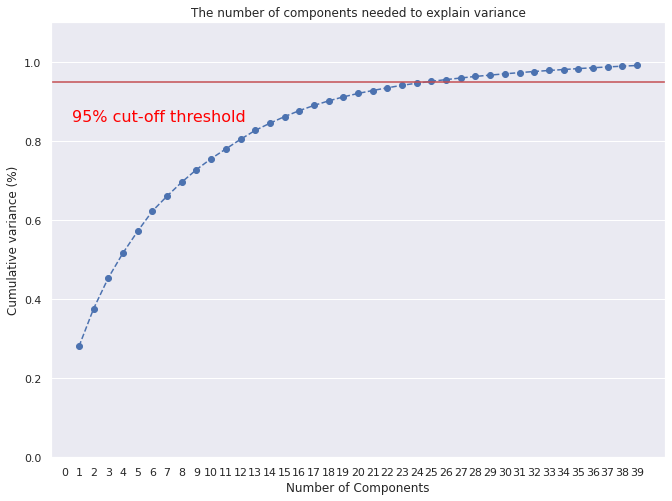

In [102]:
fig, ax = plt.subplots()
xi = np.arange(1, 40, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 40, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-') #change y to the desired variance ratio(usually .90-.95)
plt.text(0.5, 0.85, '95% cut-off threshold'.format(y), color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


We can reduce our data dimensionality from 72 to 25 while having ability to model 95% of variance of our data. 

In [104]:
#at this point we can use one of the data reduction techniques (PCA) in order to reduce computatinal complexity.
#Now we will see how reducing the dimensionality affects a lr model accuracy
#we will use a logistic regression classifier in the pipeline as well

n_comp = 25
def generate_models():
  models = dict()
  for i in range(1,40):
    steps = [('pca', PCA(n_components=i)), ('model', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
  return models

def evaluate_model(model):
	cross_v = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
	scores = cross_val_score(model, FinalData, y, scoring='accuracy', cv=cross_v, n_jobs=-1, error_score='raise')
	return scores


models = generate_models()
results, names = [],[]

for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

#We can see that using 20 principle components yields a very good accuracy, thus reducing the dimensionality from 73(after encoding) to 20
#also after the 20th component there isn't a statistically significant improvement in accuracy as the plot shows


ValueError: ignored

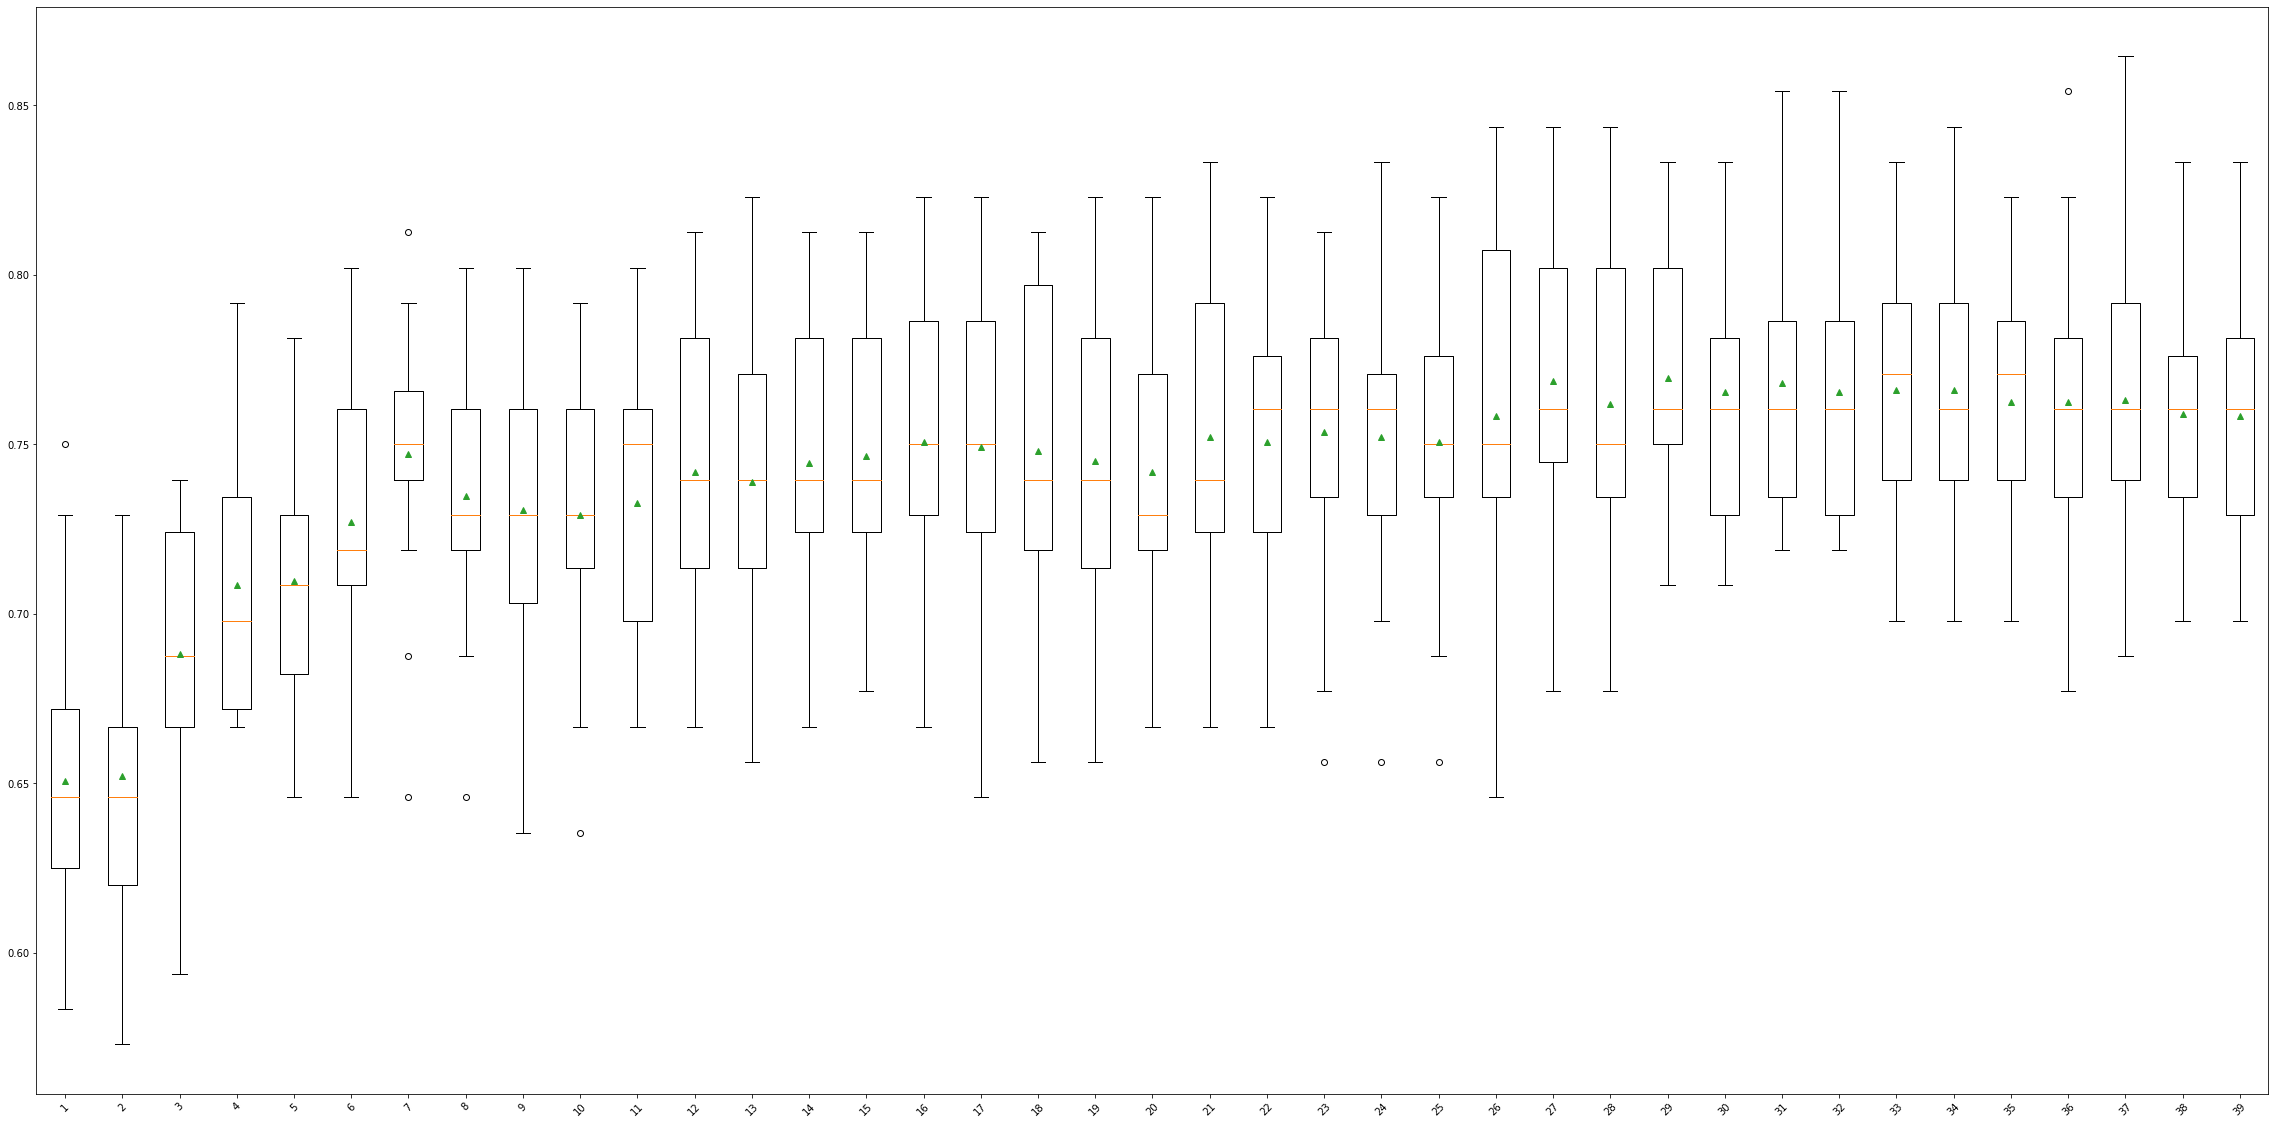

In [ ]:
# plot model performance for comparison
from matplotlib import pyplot
pyplot.figure(figsize=(40,20))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()
# print(len(results))
# the boxplot shows that there isn't a  statistically significant difference in the mean accuracy after taking more than 7 components however we choose to take the first 20 components
# as taking more components help us explain more of the data variance (92%) as we showed before 

In [ ]:
n_comp = 20
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=47)
X_pca = pca.fit_transform(FinalData)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9203
Individual variance contributions:
0.28054085449078037
0.095743148427127
0.07773459389834608
0.06297321771762811
0.05508017725428484
0.050828168179407884
0.03781443140791004
0.0352541716288014
0.031706925275697226
0.027721912137433562
0.024555664035438622
0.02431637156582511
0.022568978441898657
0.018147566709096334
0.0167918448788123
0.015035894879925264
0.01315189931183702
0.011533740366249063
0.010072698948858639
0.008720404171123368


We will use 3 ML classifiers and compare their results 

In [93]:
x_train,x_test,y_train,y_test=train_test_split(FinalData,y,test_size=0.3,random_state=49)

In [85]:
#using a decision tree
#since runnning compuatations on our dataset isn't expensive we can use the data set without reducing it 
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(acc)

[[16  0  9]
 [ 0 21  3]
 [10  2 35]]
              precision    recall  f1-score   support

           H       0.62      0.64      0.63        25
           L       0.91      0.88      0.89        24
           M       0.74      0.74      0.74        47

    accuracy                           0.75        96
   macro avg       0.76      0.75      0.76        96
weighted avg       0.75      0.75      0.75        96

0.75


In [90]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#confision matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
print(acc)

[[16  0  9]
 [ 0 21  3]
 [12  5 30]]
              precision    recall  f1-score   support

           H       0.57      0.64      0.60        25
           L       0.81      0.88      0.84        24
           M       0.71      0.64      0.67        47

    accuracy                           0.70        96
   macro avg       0.70      0.72      0.71        96
weighted avg       0.70      0.70      0.70        96

0.6979166666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [57]:
print(rf_random.best_params_)

{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [58]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [5, 10, 20, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 1000, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

In [95]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


using grid search yields the following parameters for our RF classifier.


{'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [94]:
model = grid_search.best_estimator_
y_predict=model.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
acc = accuracy_score(y_test, y_predict)
print(acc)

[[31  0  9]
 [ 0 34  3]
 [ 6  4 57]]
              precision    recall  f1-score   support

           H       0.84      0.78      0.81        40
           L       0.89      0.92      0.91        37
           M       0.83      0.85      0.84        67

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

0.8472222222222222


[[31  0  9]
 [ 0 34  3]
 [ 6  4 57]]


              precision    recall  f1-score   support

           H       0.84      0.78      0.81        40
           L       0.89      0.92      0.91        37
           M       0.83      0.85      0.84        67


    "accuracy"                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

0.8472222222222222

Looks like our grid search cross validation helped us significantly increse the f1-score(our measure of accuracy)and depending on our application we can choose to focus on precision or recall (for example we would focus on precision if we wanted to reduce FP(False positives))

In [89]:
model = rf_random.best_estimator_
y_predict=model.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
acc = accuracy_score(y_test, y_predict)
print(acc)


[[17  0  8]
 [ 0 21  3]
 [ 7  4 36]]
              precision    recall  f1-score   support

           H       0.71      0.68      0.69        25
           L       0.84      0.88      0.86        24
           M       0.77      0.77      0.77        47

    accuracy                           0.77        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96

0.7708333333333334
